In [1]:
import os
import numpy as np
import pandas as pd




os.environ['TEJAPI_BASE'] = 'https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] = 'EOCprUG3A6FZFta9iUPXWYu8JQgjmY'




## 使用 `get_universe()` 函式取得股票池
`get_universe()` 函數可以幫助我們抓取特定的股票池（市場、板塊、證券種類、產業）。  
比較每一元保留盈餘是否創造超過一元的市場價值時，由於牽涉到公司上市年限是否夠久，我們選取上市期間大於 7 年的公司。  
另外，因為 ROE 可以藉由舉債來提升，因此我們排除金融產業這類高槓桿的產業。

p.s. 關於 `get_universe()` 的說明，可參考 TQuant Lab github：[get_universe 說明](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/get_universe%E8%AA%AA%E6%98%8E.ipynb)

In [3]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2022-12-31', 
                    end = '2023-12-31',  # 選取 2022 年年底已上市的股票
                    mkt_bd_e = 'TSE',  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股 
                   )
pool

Currently used TEJ API key call quota 2/1000 (0.2%)
Currently used TEJ API key data quota 4225/10000000 (0.04%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 

In [4]:
len(pool)

911

In [8]:

import TejToolAPI

start_time = pd.Timestamp('2023-01-03')
end_time = pd.Timestamp('2023-01-03')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文','coid', 'pbr_tej','股利殖利率','收盤價','本益比','稅後淨利成長率'],
                                   transfer_to_chinese = True)



data

Currently used TEJ API key call quota 183/1000 (18.3%)
Currently used TEJ API key data quota 833121/10000000 (8.33%)


,股票代碼,日期,主產業別_中文,收盤價,股利殖利率,本益比,股價淨值比_TEJ,稅後淨利成長率_A
0,1101,2023-01-03,M1100 水泥工業,33.50,5.97,27.92,1.1902,-90.43
1,1102,2023-01-03,M1100 水泥工業,40.60,8.37,9.35,0.8914,-7.99
2,1103,2023-01-03,M1100 水泥工業,17.35,3.75,22.36,0.6311,-130.93
3,1104,2023-01-03,M1100 水泥工業,22.20,4.50,8.07,0.7202,94.83
4,1108,2023-01-03,M1100 水泥工業,10.75,5.58,10.97,0.9440,80.30
...,...,...,...,...,...,...,...,...
893,9944,2023-01-03,M9900 其他,20.30,4.93,4.17,0.6726,5.30
894,9945,2023-01-03,M9900 其他,43.55,16.07,5.73,6.5469,-2.41
895,9946,2023-01-03,M2500 建材營造,12.15,5.60,23.37,0.6179,-34.83
896,9955,2023-01-03,M9900 其他,20.40,0.00,NaN,1.4768,8.53


In [11]:
import os
import pandas as pd
import numpy as np
import tejapi
import matplotlib.pyplot as plt

latest_list_date = tejapi.fastget('TWN/APISTOCK', coid = pool, paginate = True, chinese_column_name = True, opts = {'columns':['coid', 'mdate', 'list_date']})
data1 = data.merge(latest_list_date, left_on=['股票代碼'], right_on=['公司簡稱'], how='left')
data1.drop(columns=['公司簡稱', '目前狀態'], inplace=True)
data1['已上市天數'] = (data1['日期'] - data1['最近一次上市日']).dt.days
new_onboard_company = data1.query("日期 == 日期.max() & 已上市天數 < 365")['股票代碼'].unique()
new_onboard_company

array(['3715'], dtype=object)

In [21]:
data = data[~data['股票代碼'].isin(new_onboard_company)].reset_index(drop=True)

In [22]:
#pd<2
data_last_1Y = data[data['日期'] == '2023-01-03'].reset_index(drop=True)
condition1 = data_last_1Y[
    (data_last_1Y['股價淨值比_TEJ'] < 0.2) &
    (data_last_1Y['本益比']/data_last_1Y['稅後淨利成長率_A'] < 1.2) &
    (data_last_1Y['本益比']/data_last_1Y['稅後淨利成長率_A'] > 0.8)&
    (data_last_1Y['股利殖利率'] > 3)&
     data_last_1Y['本益比'] <=16
] # 篩選符合選股條件的公司

In [23]:
columns = ['股票代碼', '股價淨值比_TEJ', '股利殖利率', '收盤價', '本益比','稅後淨利成長率_A']
filtered_data = condition1[columns]

# 输出筛选结果
print(filtered_data)

     股票代碼  股價淨值比_TEJ  股利殖利率    收盤價    本益比  稅後淨利成長率_A
0    1101     1.1902   5.97  33.50  27.92     -90.43
1    1102     0.8914   8.37  40.60   9.35      -7.99
2    1103     0.6311   3.75  17.35  22.36    -130.93
3    1104     0.7202   4.50  22.20   8.07      94.83
4    1108     0.9440   5.58  10.75  10.97      80.30
..    ...        ...    ...    ...    ...        ...
892  9944     0.6726   4.93  20.30   4.17       5.30
893  9945     6.5469  16.07  43.55   5.73      -2.41
894  9946     0.6179   5.60  12.15  23.37     -34.83
895  9955     1.4768   0.00  20.40    NaN       8.53
896  9958     2.9502   3.29  90.90  30.40     -64.57

[897 rows x 6 columns]


In [31]:
import pandas as pd

# 假設 data1 是您的數據框架
data_last_1Y = data1[data1['日期'] == '2023-01-03'].reset_index(drop=True)

# 檢查初始篩選的數據框
print(data_last_1Y.head())

# 逐步應用篩選條件
condition1 = data_last_1Y[
    (data_last_1Y['股價淨值比_TEJ'] < 0.8) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] < 0.8) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] > 0) &
    (data_last_1Y['股利殖利率'] > 3) &
    (data_last_1Y['本益比'] <= 16)
]

# 檢查篩選後的數據框是否為空
print(condition1)

# 指定要保留的列
columns = ['股票代碼', '股價淨值比_TEJ', '股利殖利率', '收盤價', '本益比', '稅後淨利成長率_A']
filtered_data = condition1[columns]

# 輸出篩選結果
print(filtered_data)

# 提取所有股票代碼並轉換為列表形式
stock_codes_list = filtered_data['股票代碼'].tolist()



   股票代碼         日期     主產業別_中文    收盤價  股利殖利率    本益比  股價淨值比_TEJ  稅後淨利成長率_A  \
0  1101 2023-01-03  M1100 水泥工業  33.50   5.97  27.92     1.1902     -90.43   
1  1102 2023-01-03  M1100 水泥工業  40.60   8.37   9.35     0.8914      -7.99   
2  1103 2023-01-03  M1100 水泥工業  17.35   3.75  22.36     0.6311    -130.93   
3  1104 2023-01-03  M1100 水泥工業  22.20   4.50   8.07     0.7202      94.83   
4  1108 2023-01-03  M1100 水泥工業  10.75   5.58  10.97     0.9440      80.30   

     最近一次上市日  已上市天數  
0 1962-02-09  22243  
1 1962-06-18  22114  
2 1969-11-27  19395  
3 1971-02-02  18963  
4 1990-06-06  11899  
     股票代碼         日期     主產業別_中文     收盤價  股利殖利率    本益比  股價淨值比_TEJ  稅後淨利成長率_A  \
3    1104 2023-01-03  M1100 水泥工業   22.20   4.50   8.07     0.7202      94.83   
23   1234 2023-01-03  M1200 食品工業   32.65   5.21  13.78     0.7225      29.29   
58   1434 2023-01-03  M1400 紡織纖維   26.70   3.75  12.71     0.7808      77.93   
73   1451 2023-01-03  M1400 紡織纖維   21.00   4.76   8.02     0.5680     179.99   
115  

In [30]:
print(stock_codes_list)

['1104', '1234', '1434', '1451', '1531', '1906', '2107', '2316', '2392', '2474', '2515', '2534', '2603', '2609', '2617', '2852', '3015', '3622', '4999', '5533', '6136', '6605', '8103', '9944']


## 取出符合所有條件的股票

In [32]:
tickers = list(stock_codes_list)
tickers

['1104',
 '1234',
 '1434',
 '1451',
 '1531',
 '1906',
 '2107',
 '2316',
 '2392',
 '2474',
 '2515',
 '2534',
 '2603',
 '2609',
 '2617',
 '2852',
 '3015',
 '3622',
 '4999',
 '5533',
 '6136',
 '6605',
 '8103',
 '9944']

In [33]:
len(tickers)

24

## 查看標的證券名稱與產業

In [36]:
import tejapi

tejapi.ApiConfig.api_key = 'EOCprUG3A6FZFta9iUPXWYu8JQgjmY'
tejapi.ApiConfig.ignoretz = 'https://api.tej.com.tw'

ticker_data = tejapi.get('TWN/APISTOCK',  # 證券屬性資料表
                  coid = tickers,
                  opts = {'columns':['coid', 'stk_name']},
                  chinese_column_name = True,
                  paginate = True)

ticker_data

,公司簡稱,證券名稱
None,,
0,1104,環泥
1,1234,黑松
2,1434,福懋
3,1451,年興
4,1531,高林股
5,1906,寶隆
6,2107,厚生
7,2316,楠梓電
8,2392,正崴


## 利用 TQuant Lab 回測股票池買進持有 1 年的績效

### 導入股價資料
在 zipline 中，我們使用 `os` 搭配 `!zipline ingest` 將股價資料導入到本地端。常用寫法為:
``` python
!zipline ingest -b tquant
```
在 ingest 之前，需先使用 `os` 設定環境變數，
``` python
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'  
# IR0001 為加權股價報酬指數，通常用來當作回測 benchmark。
```

In [56]:
start = '2021-01-01'
end = '2023-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

Merging daily equity files:
Currently used TEJ API key call quota 218/1000 (21.8%)
Currently used TEJ API key data quota 1003754/10000000 (10.04%)


[2024-06-09 09:34:30.593043] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-09 09:34:37.020260] INFO: zipline.data.bundles.core: Ingest tquant successfully.


### Initialize 函式

`initialize` 為構建 zipline 交易策略的重要函式，會在回測開始前被呼叫一次，主要任務為設定回測環境，常見用於設定滑價或手續費。  
zipline 提供四種滑價計算方法與三種手續費計算方法。於此範例中，我們使用 `VolumeShareSlippage` 計算滑價、`Custom_TW_Commission` 計算手續費。

註：
- 滑價設定方法可參考： TQuant Lab github：[zipline slippage model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Slippage.ipynb)
- 手續費設定方法可參考： TQuant Lab github：[zipline commission model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Commission%20Models.ipynb)

除此之外，我們可以注意到 initialize 含有一個參數 **context__**，**context__** 為一個命名空間 (namespace)，可以在儲存各種自定義之變數並且在每次交易日中循環呼叫。  舉例來說，我們設置一個變數 (context.day = 0) 來計算交易日天數與一個變數 (context.tickers = tickers) 紀錄股票標的。

In [57]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
    set_benchmark(symbol('IR0001'))

### Handle_data 函式

`handle_data` 為構建 zipline 交易策略的重要函式，會在回測開始後每天被呼叫，主要任務為設定交易策略、下單與紀錄交易資訊。  
在此範例中，我們加入下單函式 `order_percent`，用以將資產均分購買股票池中的股票。 

註：
- `order_percent` 使用方法可參考： TQuant Lab github：[Zipline Order (percent & target_percent)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(percent%20%26%20target_percent).ipynb)

In [58]:
def handle_data(context, data):

    # 回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))

    context.day += 1  # 以免重複買進，並紀錄交易天數

### Analyze 函式

`analyze` 主要用於回測後視覺化策略績效與風險，這裡我們以 `matplotlib` 繪製投組價值與大盤走勢的比較圖。  
其中 `analyze` 有兩個參數 **context** 與 **results**，**context** 就與上述相同，用以紀錄交易訊息，**results** 就是最終 ``run_algorithm`` 輸出的資料表 -- *results*。我們可以提取裡面特定欄位來繪製圖表。

In [59]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

### Run_algorithm 函式

進行策略回測。

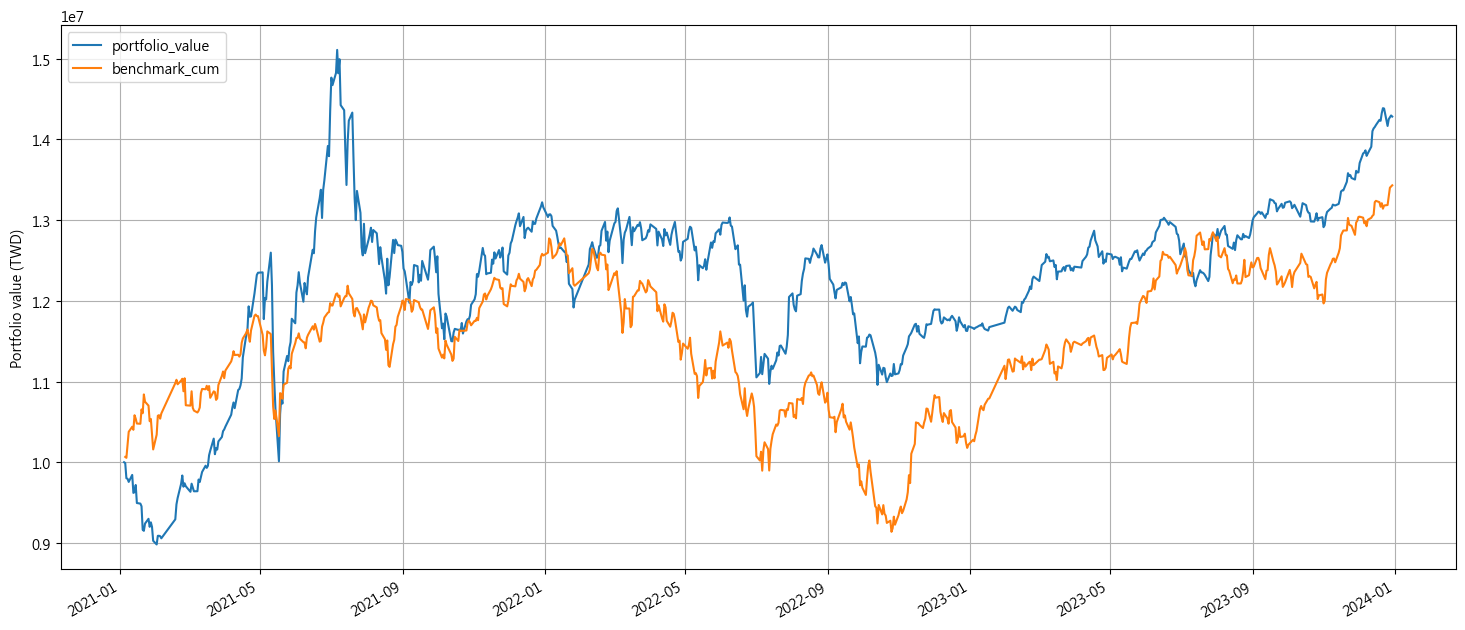

,period_open,period_close,pnl,longs_count,transactions,returns,orders,starting_cash,long_value,benchmark_return,...,max_leverage,benchmark_period_return,excess_return,benchmark_volatility,trading_days,period_label,treasury_period_return,max_drawdown,algo_volatility,benchmark_cum
2021-01-04 13:30:00+08:00,2021-01-04 09:01:00+08:00,2021-01-04 13:30:00+08:00,0.000000,0,[],0.000000,"[{'id': 'b7cbf266e5964589b601d986eb095fc0', 'd...",1.000000e+07,0.00,NaN,...,0.000000,0.000000,0.000000,NaN,1,2021-01,0.0,0.000000,NaN,NaN
2021-01-05 13:30:00+08:00,2021-01-05 09:01:00+08:00,2021-01-05 13:30:00+08:00,-10210.799481,24,"[{'amount': 12400, 'dt': 2021-01-05 13:30:00+0...",-0.001021,"[{'id': 'b7cbf266e5964589b601d986eb095fc0', 'd...",1.000000e+07,7069682.60,0.006576,...,0.707691,0.006576,-0.007597,NaN,2,2021-01,0.0,-0.001021,0.011462,1.006576e+07
2021-01-06 13:30:00+08:00,2021-01-06 09:01:00+08:00,2021-01-06 13:30:00+08:00,-188439.397543,24,"[{'amount': 5292, 'dt': 2021-01-06 13:30:00+08...",-0.018863,"[{'id': 'b7cbf266e5964589b601d986eb095fc0', 'd...",2.920107e+06,8606537.15,-0.001126,...,0.878097,0.005442,-0.025307,0.086463,3,2021-01,0.0,-0.019865,0.168400,1.005442e+07
2021-01-07 13:30:00+08:00,2021-01-07 09:01:00+08:00,2021-01-07 13:30:00+08:00,-6298.719184,24,"[{'amount': 5750, 'dt': 2021-01-07 13:30:00+08...",-0.000643,"[{'id': '146972f59bfb4dbbaafcbdff3196872a', 'd...",1.194813e+06,8907220.05,0.015408,...,0.909359,0.020935,-0.041430,0.131343,4,2021-01,0.0,-0.020495,0.145474,1.020935e+07
2021-01-08 13:30:00+08:00,2021-01-08 09:01:00+08:00,2021-01-08 13:30:00+08:00,-39104.180000,24,"[{'amount': 5650, 'dt': 2021-01-08 13:30:00+08...",-0.003992,"[{'id': '146972f59bfb4dbbaafcbdff3196872a', 'd...",8.878310e+05,9128986.15,0.016429,...,0.935736,0.037708,-0.062113,0.130990,5,2021-01,0.0,-0.024405,0.126244,1.037708e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 13:30:00+08:00,2023-12-25 09:01:00+08:00,2023-12-25 13:30:00+08:00,-216094.400000,24,[],-0.015024,[],2.258723e+06,11908333.25,0.000466,...,0.996608,0.318751,0.097955,0.168702,725,2023-12,0.0,-0.274733,0.197173,1.318751e+07
2023-12-26 13:30:00+08:00,2023-12-26 09:01:00+08:00,2023-12-26 13:30:00+08:00,84939.800000,24,[],0.005996,[],2.258723e+06,11993273.05,0.008348,...,0.996608,0.329760,0.095440,0.168650,726,2023-12,0.0,-0.274733,0.197063,1.329760e+07
2023-12-27 13:30:00+08:00,2023-12-27 09:01:00+08:00,2023-12-27 13:30:00+08:00,23221.150000,24,[],0.001629,[],2.258723e+06,12016494.20,0.007874,...,0.996608,0.340230,0.087292,0.168590,727,2023-12,0.0,-0.274733,0.196929,1.340230e+07
2023-12-28 13:30:00+08:00,2023-12-28 09:01:00+08:00,2023-12-28 13:30:00+08:00,22304.550000,24,[],0.001562,[],2.258723e+06,12038798.75,0.001055,...,0.996608,0.341643,0.088109,0.168474,728,2023-12,0.0,-0.274733,0.196794,1.341643e+07


In [60]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

# 取出 results 中的 positions, transactions & orders 資料表
positions, transactions, orders = get_transaction_detail(results)   
results

<Axes: >

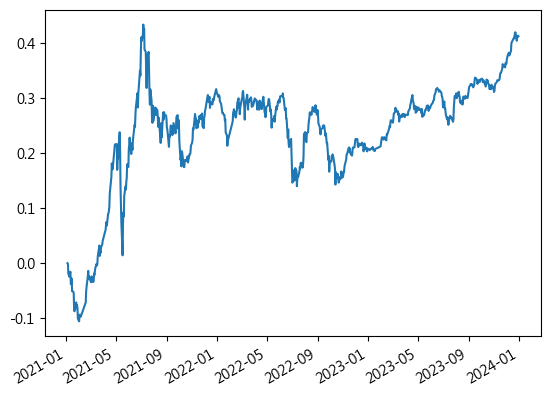

In [61]:
results.returns.cumsum().plot()  # 繪製累積回報圖

## Pyfolio

Pyfolio 與 zipline 的回測結果兼容，讓我們輕鬆用幾行程式碼，就能產出我們需要的投資風險及績效圖表。

p.s. 詳細 Pyfolio 使用方法可參考： TQuant Lab github：[Pyfolio](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Pyfolio.ipynb)

In [62]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

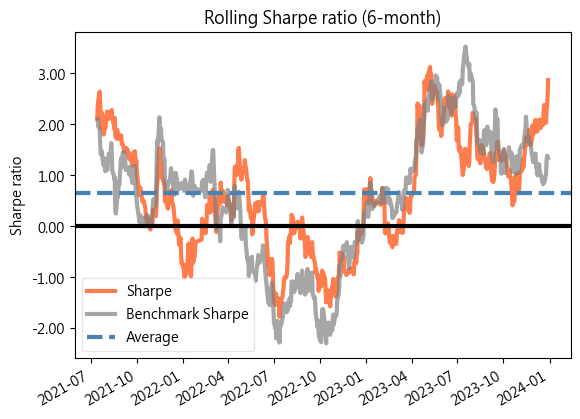

In [63]:
# 繪製夏普比率圖

from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)

Start date,2021-01-04
End date,2023-12-29
Total months,34
,Backtest
Annual return,13.116%
Cumulative returns,42.836%
Annual volatility,19.666%
Sharpe ratio,0.73
Calmar ratio,0.48
Stability,0.24
Max drawdown,-27.473%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.47,2021-07-06,2022-10-13,NaT,NaN
1,20.52,2021-05-10,2021-05-17,2021-06-15,26
2,10.19,2021-01-04,2021-02-01,2021-03-18,46
3,4.69,2021-05-03,2021-05-04,2021-05-10,6
4,2.62,2021-06-22,2021-06-23,2021-06-25,4


Stress Events,mean,min,max
New Normal,0.06%,-6.73%,5.85%


Top 10 long positions of all time,max
sid,
2609,18.71%
2603,13.80%
2617,9.46%
6605,6.74%
3015,5.66%
4999,5.43%
1451,5.21%
1531,5.12%
8103,4.97%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2609,18.71%
2603,13.80%
2617,9.46%
6605,6.74%
3015,5.66%
4999,5.43%
1451,5.21%
1531,5.12%
8103,4.97%


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


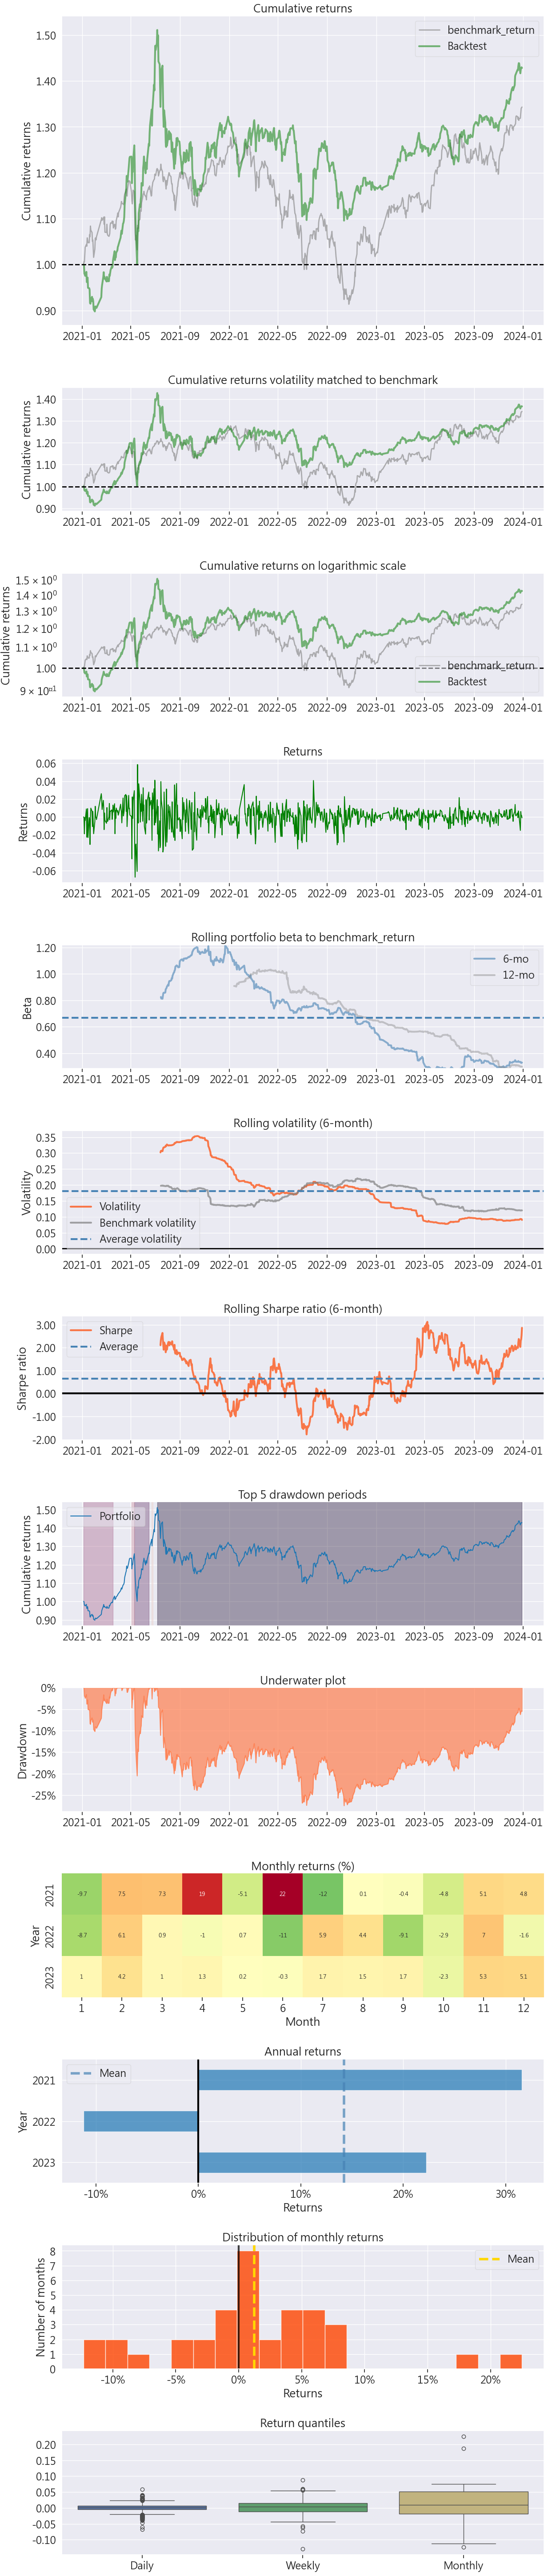

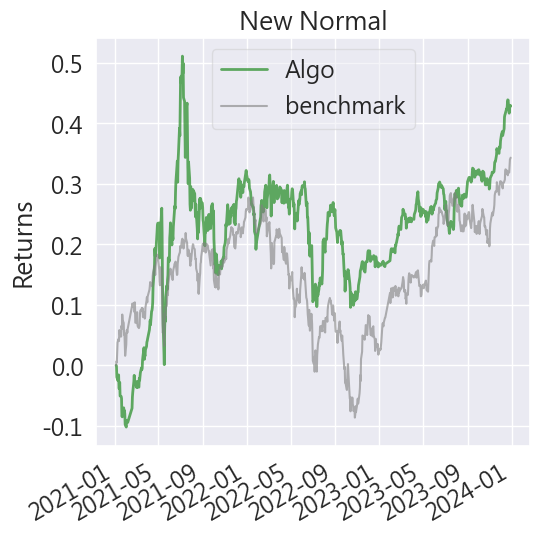

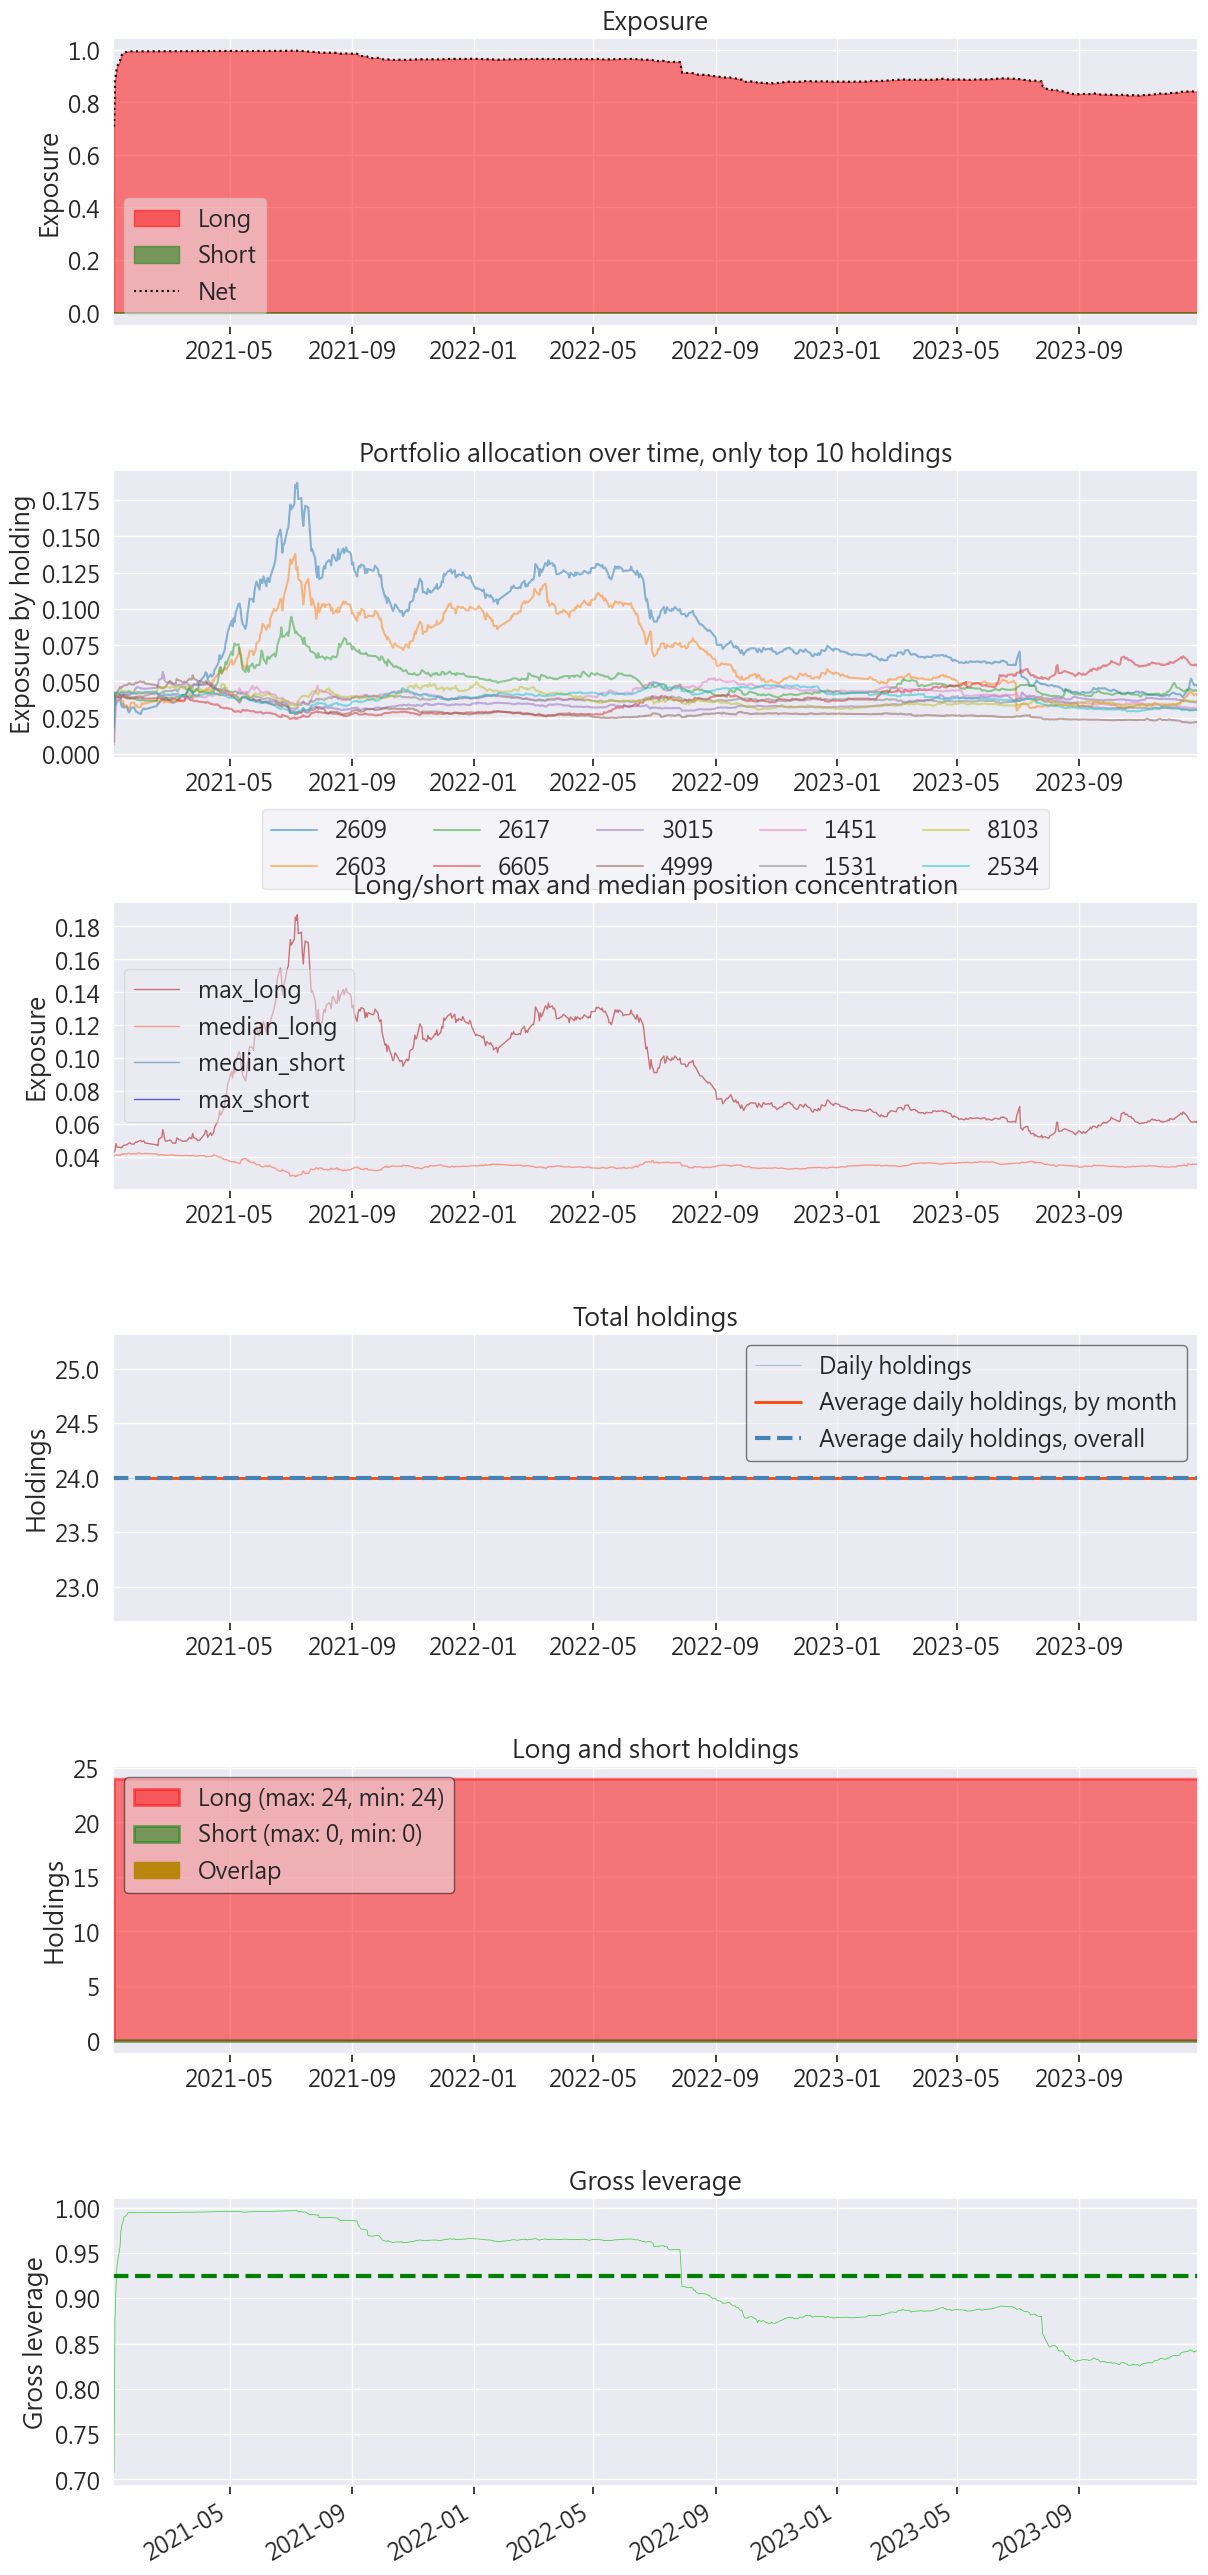

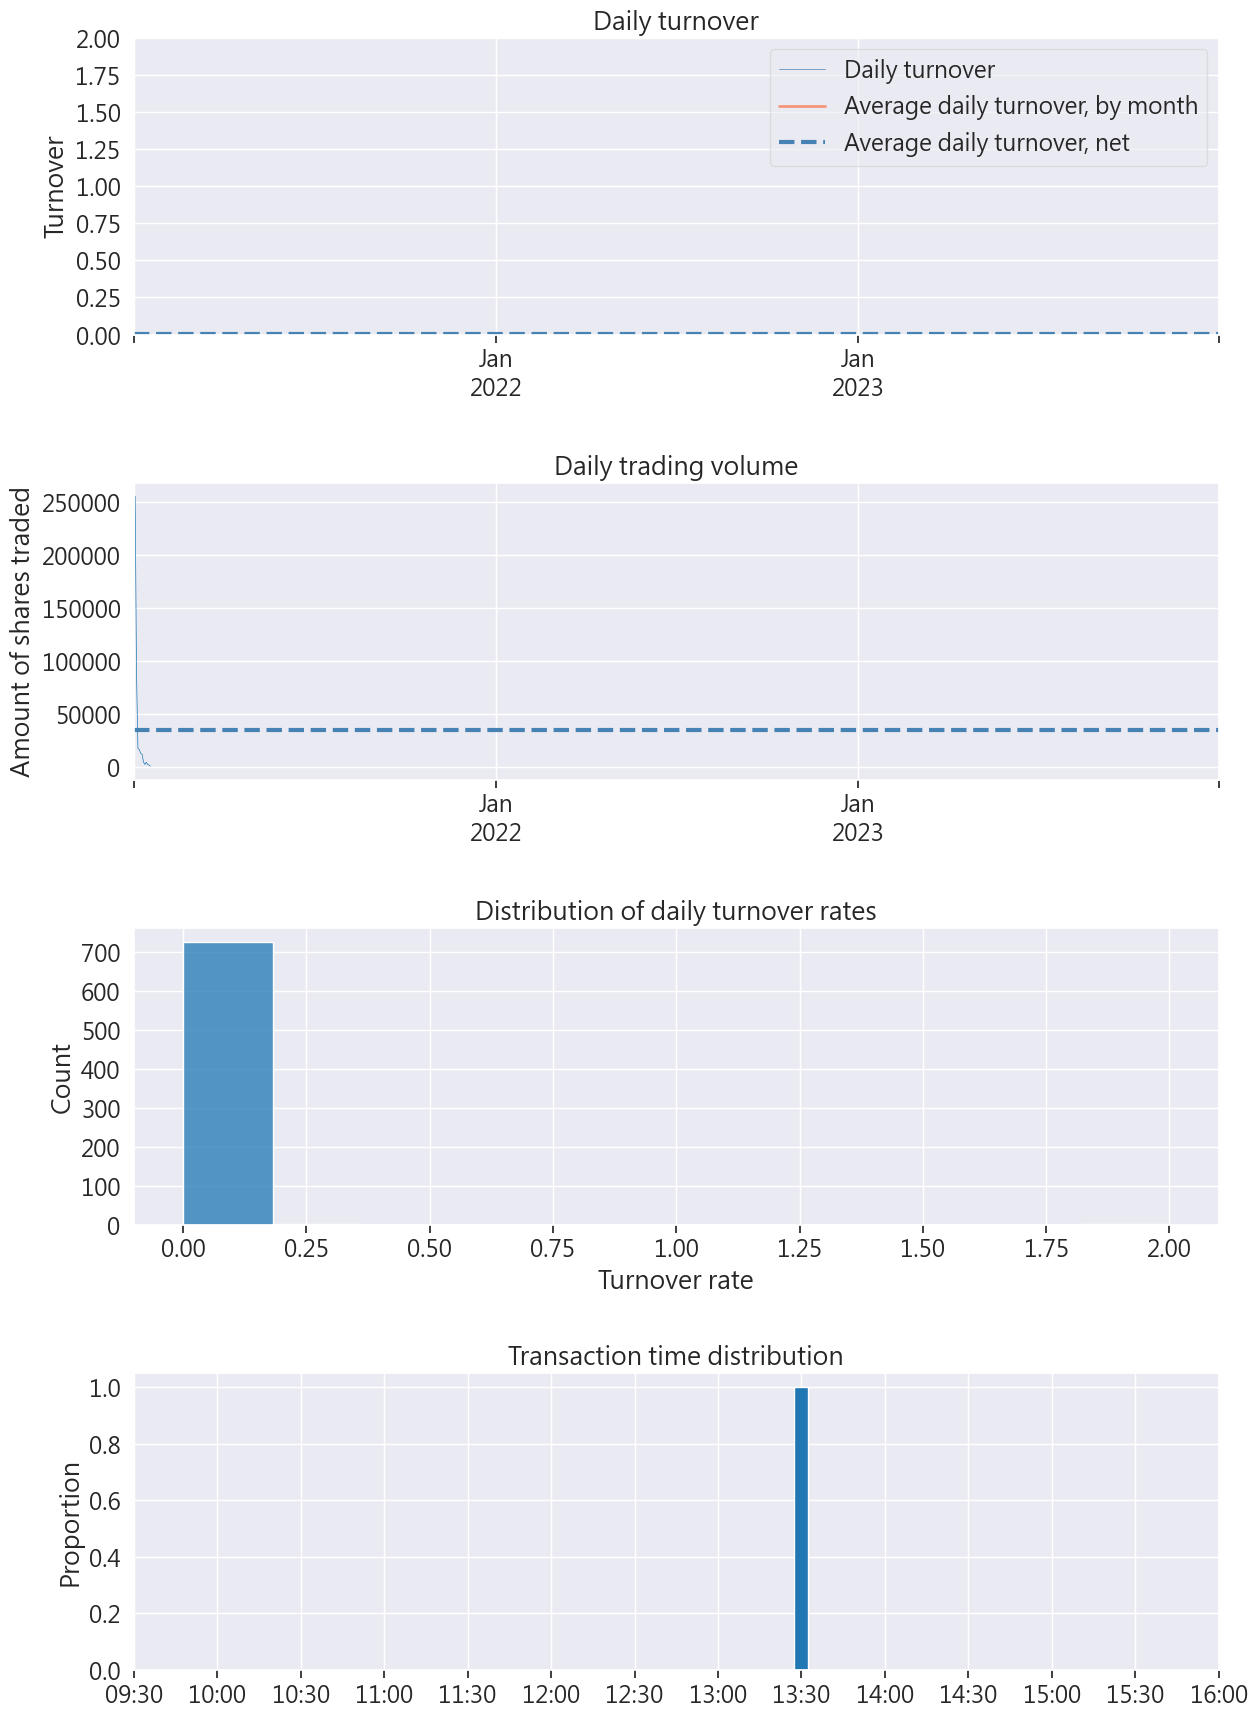

In [64]:
# 繪製 Pyfolio 中提供的所有圖表

pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )